In [ ]:
from astropy.cosmology import FlatLambdaCDM
import importlib
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import sys

sys.path.append("../../")
from LuStCodeSnippets_py.astronomy import absmag

importlib.reload(absmag)

<module 'src_py.astronomy.absmag' from '/home/lukas/github/code_snippets/src_py/astronomy/absmag.py'>

In [12]:
#quick conversions
df = pl.from_dicts([
    dict(m=18.6, z=0.15, pb="g"),
    dict(m=18.6, z=0.15, pb="r"),
    dict(m=18.37, z=0.025, pb="g"),
    dict(m=18.37, z=0.025, pb="r"),
])
res = absmag.absmag(
    m=df["m"], z=df["z"],
    cosmo=FlatLambdaCDM(70, 0.3, 2.725),
    pb=df["pb"],
    fn_confstats="../../data/lut_snana_snia.csv"
)

df_res = pl.from_records(res, schema=["M", "std", "offset"])

df_res = pl.concat([df, df_res], how="horizontal")
with pl.Config() as cfg:
    cfg.set_tbl_formatting("ASCII_MARKDOWN")
    print(df_res)


shape: (4, 6)
| m     | z     | pb  | M          | std      | offset   |
| ---   | ---   | --- | ---        | ---      | ---      |
| f64   | f64   | str | f64        | f64      | f64      |
|-------|-------|-----|------------|----------|----------|
| 18.6  | 0.15  | g   | -20.665944 | 0.25707  | 0.177747 |
| 18.6  | 0.15  | r   | -20.665944 | 0.208526 | 0.234536 |
| 18.37 | 0.025 | g   | -16.819614 | 0.25707  | 0.177747 |
| 18.37 | 0.025 | r   | -16.819614 | 0.208526 | 0.234536 |


[-19.43443299 -19.35405783 -19.48803235 -19.3361442  -19.09365756
 -19.10085314 -19.26885999 -19.40229833 -19.30575779 -19.33613915
 -19.32197604 -19.20556259 -19.62036207 -19.11120225 -19.42993302
 -19.35920182 -19.30836382 -19.43083384 -19.43133819 -19.53964284]
[0.35871996        nan 0.28218296        nan 0.2169962  0.35871996
        nan 0.26375846        nan 0.32959239        nan 0.28776916
 0.23602313 0.2169962         nan        nan 0.30042472        nan
 0.37559482 0.37559482]
[0.52965159        nan 0.12192909        nan 0.4645179  0.52965159
        nan 0.20597577        nan 0.80719256        nan 0.100089
 0.3184196  0.4645179         nan        nan 0.12441024        nan
 0.73154075 0.73154075]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


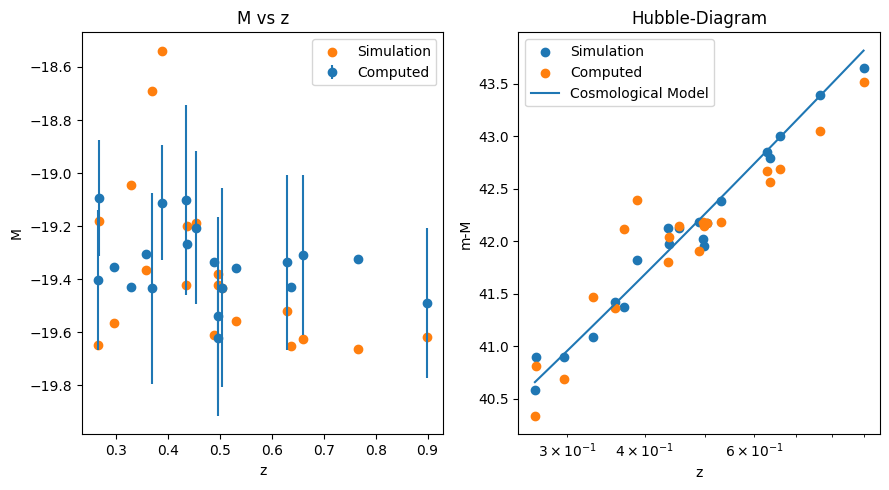

In [10]:
#some dataframe of observations/simulations (sampled from https://github.com/des-science/DES-SN5YR/tree/main/4_DISTANCES_COVMAT)
df = pl.from_dicts([
    {"mB": 22.6803, "mBERR": 0.0297, "mB_corr": 22.0484, "zHD": 0.36966, "zHDERR": 0.0017, "pb": "g", "MU": 41.3716},
    {"mB": 21.333, "mBERR": 0.0281, "mB_corr": 21.575, "zHD": 0.29686, "zHDERR": 0.00164, "pb": "Y", "MU": 40.8982},
    {"mB": 24.031, "mBERR": 0.0583, "mB_corr": 24.3261, "zHD": 0.89888, "zHDERR": 0.00215, "pb": "z", "MU": 43.6493},
    {"mB": 22.5743, "mBERR": 0.0589, "mB_corr": 22.8624, "zHD": 0.48813, "zHDERR": 0.00179, "pb": "Y", "MU": 42.1856},
    {"mB": 21.7198, "mBERR": 0.0366, "mB_corr": 21.5782, "zHD": 0.26775, "zHDERR": 0.00162, "pb": "z", "MU": 40.9014},
    {"mB": 22.7008, "mBERR": 0.0422, "mB_corr": 22.7998, "zHD": 0.4351, "zHDERR": 0.00175, "pb": "g", "MU": 42.123},
    {"mB": 22.7698, "mBERR": 0.0747, "mB_corr": 22.6474, "zHD": 0.43774, "zHDERR": 0.00175, "pb": "Y", "MU": 41.9706},
    {"mB": 20.9328, "mBERR": 0.0235, "mB_corr": 21.2559, "zHD": 0.26628, "zHDERR": 0.00161, "pb": "r", "MU": 40.5791},
    {"mB": 22.0543, "mBERR": 0.028, "mB_corr": 22.0949, "zHD": 0.35791, "zHDERR": 0.00169, "pb": "Y", "MU": 41.4181},
    {"mB": 23.3303, "mBERR": 0.0899, "mB_corr": 23.5277, "zHD": 0.6291, "zHDERR": 0.00191, "pb": "g", "MU": 42.8509},
    {"mB": 23.7241, "mBERR": 0.0322, "mB_corr": 24.064, "zHD": 0.76584, "zHDERR": 0.00203, "pb": "Y", "MU": 43.3872},
    {"mB": 22.9417, "mBERR": 0.0933, "mB_corr": 22.8046, "zHD": 0.45394, "zHDERR": 0.00177, "pb": "r", "MU": 42.1279},
    {"mB": 22.5284, "mBERR": 0.0439, "mB_corr": 22.6273, "zHD": 0.49743, "zHDERR": 0.0018, "pb": "z", "MU": 41.9505},
    {"mB": 23.2806, "mBERR": 0.0938, "mB_corr": 22.4958, "zHD": 0.38809, "zHDERR": 0.00171, "pb": "z", "MU": 41.819},
    {"mB": 23.1372, "mBERR": 0.0433, "mB_corr": 23.4661, "zHD": 0.63681, "zHDERR": 0.00192, "pb": "Y", "MU": 42.7893},
    {"mB": 22.8268, "mBERR": 0.0626, "mB_corr": 23.0595, "zHD": 0.53112, "zHDERR": 0.00183, "pb": "Y", "MU": 42.3827},
    {"mB": 23.3801, "mBERR": 0.07, "mB_corr": 23.682, "zHD": 0.65992, "zHDERR": 0.00194, "pb": "r", "MU": 43.0052},
    {"mB": 22.0423, "mBERR": 0.0267, "mB_corr": 21.7633, "zHD": 0.32988, "zHDERR": 0.00166, "pb": "Y", "MU": 41.0865},
    {"mB": 22.7398, "mBERR": 0.0653, "mB_corr": 22.8502, "zHD": 0.50394, "zHDERR": 0.00181, "pb": "g", "MU": 42.1735},
    {"mB": 22.6445, "mBERR": 0.0388, "mB_corr": 22.7011, "zHD": 0.49611, "zHDERR": 0.0018, "pb": "g", "MU": 42.0243},
])
# print(df)

#compute absolute mags
cosmo = FlatLambdaCDM(70, 0.3, 2.725)   #define cosmology
M, std, offset = absmag.absmag(
    m=df["mB_corr"].to_numpy().flatten(), z=df["zHD"].to_numpy().flatten(),
    cosmo=cosmo,
    pb=df["pb"].to_numpy().flatten(),
    fn_confstats="../../data/lut_snana_snia.csv"
)

print(M)
print(std)
print(offset)

z_artificial = np.linspace(df["zHD"].min(), df["zHD"].max(), 100)
mu_artificial = cosmo.distmod(z_artificial)

#test plot
fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(121, title="M vs z")
ax2 = fig.add_subplot(122, title="Hubble-Diagram")
ax1.errorbar(df["zHD"], M, yerr=std, ls="", marker="o", label="Computed", c="C0")
ax1.scatter(df["zHD"], df["mB"] - df["MU"], label="Simulation", c="C1")
ax2.scatter(df["zHD"], df["MU"], label="Simulation")
ax2.scatter(df["zHD"], df["mB"]-M, label="Computed")
ax2.plot(z_artificial, mu_artificial, label="Cosmological Model")
ax2.set_xscale("log")
ax1.set_xlabel("z")
ax2.set_xlabel("z")
ax1.set_ylabel("M")
ax2.set_ylabel("m-M")
fig.tight_layout()
ax1.legend()
ax2.legend()
plt.show()